# Logistic Regression

Logistic Regression is a popular algorithm used for classification tasks, where the goal is to predict categorical outcomes (e.g., class labels). Despite the name "regression," it is used for binary or multiclass classification, not regression.

# 1. What is Logistic Regression?

Logistic Regression is a statistical method used to model the probability of a binary (yes/no) outcome based on one or more predictor variables (features). It calculates the probability that a given input belongs to a particular class.

**Binary Classification**: It predicts one of two possible outcomes (0 or 1, True or False, Yes or No).

**Multinomial Classification**: It can also be extended to predict multiple classes (more than two categories).

The key idea is that instead of predicting the outcome directly (as in linear regression), Logistic Regression predicts the probability of the outcome belonging to a particular class.

# 2. How Does Logistic Regression Work?

Logistic Regression uses the sigmoid function to map the output of a linear equation to a probability value between 0 and 1.

Sigmoid Function (Logistic Function):
The sigmoid function is defined as:

**σ(z)=1/1+e^−z**

Where:

𝑧
z is a linear combination of the input features: 
𝑧
=
𝑤
0
+
𝑤
1
𝑥
1
+
𝑤
2
𝑥
2
+
⋯
+
𝑤
𝑛
𝑥
𝑛
z=w 
0
​
 +w 
1
​
 x 
1
​
 +w 
2
​
 x 
2
​
 +⋯+w 
n
​
 x 
n
​
 .
𝑒
e is the base of the natural logarithm.
The output of the sigmoid function is interpreted as the probability 
𝑝
p that the input 
𝑥
x belongs to class 1:

**p=P(y=1∣x)=1/1+e ^−(w 0​+w 1​ x 1​ +w 2​ x2​ +⋯+w n​ x n )**
If the probability 
𝑝

p is greater than 0.5, the model classifies the input as belonging to class 1 (positive class); otherwise, it classifies it as class 0 (negative class).

 
 


# 3. Steps in Logistic Regression

**Initialize Parameters**: Initialize the weights randomly or to zero.

**Compute the Sigmoid Function**: For each data point, calculate the probability using the logistic function.

**Calculate the Cost Function**: Measure the performance of the model using log-loss (cross-entropy).

**Gradient Descent**: Update the weights to minimize the cost function.

**Predict**: Once the model is trained, use the sigmoid function to predict the class labels.

# 4. Decision Boundary in Logistic Regression

The decision boundary in Logistic Regression is determined by the equation:

***
𝑤
0
+
𝑤
1
𝑥
1
+
𝑤
2
𝑥
2
+
⋯
=
0
w 
0
​
 +w 
1
​
 x 
1
​
 +w 
2
​
 x 
2
​
 +⋯=0
 ***
 
This is the boundary where the probability of class 1 is exactly 0.5. It divides the feature space into two regions: one where the predicted probability is greater than 0.5 (class 1), and one where it is less than 0.5 (class 0).

# 5. Advantages of Logistic Regression

**Simplicity**: Logistic Regression is a simple, easy-to-understand model, making it ideal for binary classification problems.

**Interpretability**: The coefficients or weights learned by the model can be interpreted as the effect of each feature on the probability of the outcome.

**Efficient**: It is computationally efficient and requires relatively less data to train, compared to complex models like deep neural networks.

**Probabilistic Output**: It provides probabilities, which can be useful when you need more than just the predicted class (e.g., for decision-making or ranking).

# 6. Disadvantages of Logistic Regression

**Linear Decision Boundary**: Logistic Regression can only model linear decision boundaries. It struggles to capture non-linear relationships between the features and the target.

**Overfitting**: If there are too many features or the features are highly correlated, the model may overfit the data. Regularization techniques (like L1 or L2 regularization) can help mitigate this.

**Sensitive to Outliers**: Logistic Regression can be sensitive to outliers, which can significantly affect the estimated coefficients.

# 7. Applications of Logistic Regression

**Medical Diagnosis**: Predicting whether a patient has a particular disease based on diagnostic test results.

**Credit Scoring**: Predicting whether a customer will default on a loan.

**Marketing**: Predicting whether a customer will buy a product or not.

**Spam Detection**: Classifying an email as spam or not spam.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
#sample dataset:study hours vs pass/fail(cinary classification)
X=np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]])#study hours
y=np.array([0,0,0,0,1,1,1,1,1,1])#0=Fail,1=pass

# Spliting data

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Training the model

In [8]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

# Make predictions

In [9]:
y_pred=model.predict(X_test)
print("Predictions:",y_pred)

Predictions: [1 0]


# Evaluate model

In [10]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracyof the model:",accuracy)

Accuracyof the model: 1.0


# Visualize the Logistic Regression Curve

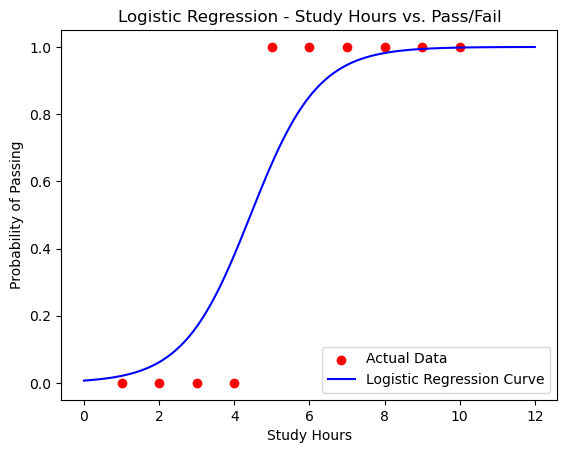

In [13]:
# Generate values for plotting
X_range = np.linspace(0, 12, 100).reshape(-1, 1)
y_prob = model.predict_proba(X_range)[:, 1]  # Get the probability of class 1

plt.scatter(X, y, color="red", label="Actual Data")
plt.plot(X_range, y_prob, color="blue", label="Logistic Regression Curve")
plt.xlabel("Study Hours")
plt.ylabel("Probability of Passing")
plt.title("Logistic Regression - Study Hours vs. Pass/Fail")
plt.legend()
plt.show()


# Logistic regression on heart.csv

# Import necessary Libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc

In [16]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Exploraratory Data Analysis(EDA)

In [17]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [18]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


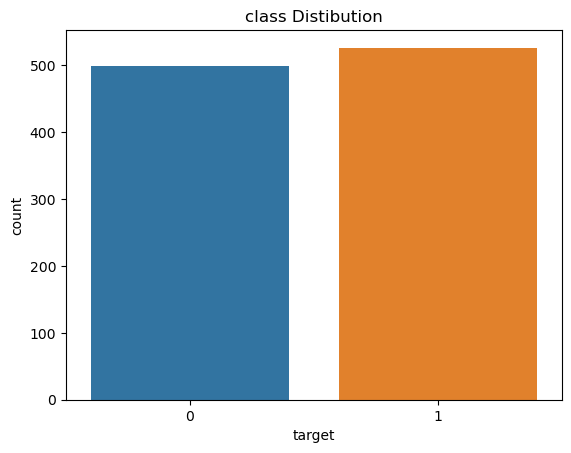

In [19]:
sns.countplot(x=df['target'])
plt.title("class Distibution")
plt.show()

# Feature Selection And Processing

In [23]:
#define independent variables(X) and target varaiable(y)
X=df.drop("target",axis=1)
y=df["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#standardize the features
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Train Logistic Regression Model

In [26]:
# Train Logistic Regression Model
model=LogisticRegression()
model.fit(X_train,y_train)

#predict on test data 
y_pred=model.predict(X_test)
print(y_pred)

[1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1
 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0]


# Model Evaluation

In [27]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracyof the model:",accuracy)

Accuracyof the model: 0.7951219512195122


In [28]:
#classification Report
print("\Classification Report:\n",classification_report(y_test,y_pred))

\Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



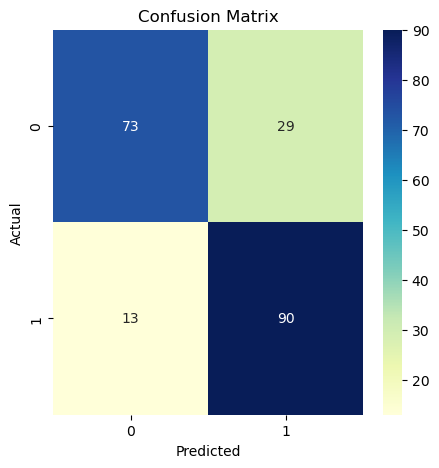

In [36]:
#confusion Matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt="d",cmap="YlGnBu")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()